In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
DATA_DIR = '/home/raian/doutorado/Dados/generated'
DATASET = os.path.join(DATA_DIR, 'dataset_286x286_tmstk-2013-2017')
train_tfrecord = os.path.join(DATASET, 'dataset_train.tfrecord')

In [6]:
# dataset = np.load(DATASET_FILE)
# train_images = dataset['images'][1005:1010, :, :, :]
# train_labels = dataset['labels'][1005:1010, :, :, :]

In [7]:
# def wrap_bytes(value):
#     return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

# def wrap_float(value):
#     return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

# def wrap_int64(value):
#     return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

# def save_to_tfrecord(out_path, imgs, labels):
#     with tf.python_io.TFRecordWriter(out_path) as writer:
# #         total_prog = imgs.shape[0]
#         for i in range(imgs.shape[0]):
# #             print_progress(i, total_prog)
#             img = imgs[i, :, :, :]
#             lbl = labels[i, :, :, :]
            
#             height = img.shape[0]
#             width = img.shape[1]
#             channels = img.shape[2]
            
#             img_raw = img.tostring()
#             lbl_raw = lbl.tostring()
            
#             feature = {'image': wrap_bytes(img_raw),
#                        'label': wrap_bytes(lbl_raw),
#                        'channels': wrap_int64(channels),
#                        'height': wrap_int64(height),
#                        'width': wrap_int64(width)}
            
#             example = tf.train.Example(features=tf.train.Features(feature=feature))
#             writer.write(example.SerializeToString())
            
# save_to_tfrecord(train_tfrecord, train_images, train_labels)

In [8]:
def parse(serialized):
    features = {'image': tf.FixedLenFeature([], tf.string, default_value=''),
                'channels': tf.FixedLenFeature([], tf.int64, default_value=0),
                'label': tf.FixedLenFeature([], tf.string, default_value=''),
                'height': tf.FixedLenFeature([], tf.int64, default_value=0),
                'width': tf.FixedLenFeature([], tf.int64, default_value=0)}

    parsed_features = tf.parse_single_example(serialized=serialized, features=features)
    num_bands = parsed_features['channels']
    height = parsed_features['height']
    width = parsed_features['width']
    
#     shape_img = tf.stack([height, width, num_bands])
#     shape_lbl = tf.stack([height, width, 1])
    
    image = tf.decode_raw(parsed_features['image'], tf.float32)
    image = tf.reshape(image, [286, 286, 10])

    label = tf.decode_raw(parsed_features['label'], tf.int32)
    label = tf.reshape(label, [286, 286, 1])
    
    print(image.shape)

    return image, label

(286, 286, 10)


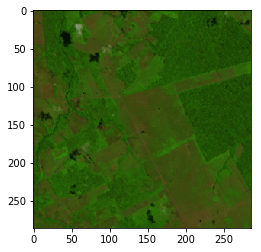

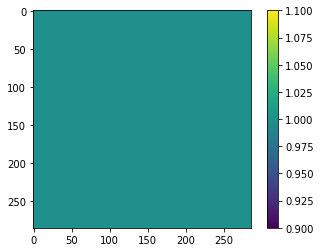

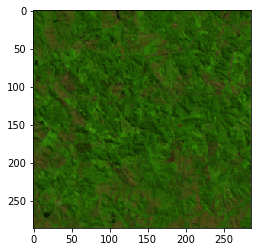

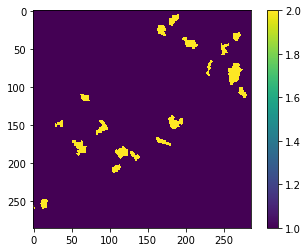

In [9]:
#TODO: Try to save the total number of chips in the TFRecord
tf.enable_eager_execution()
ds = tf.data.TFRecordDataset(train_tfrecord)
ds = ds.take(2).map(parse)
for img_t, lbl_t in ds:
    img = img_t.numpy()
    lbl = lbl_t.numpy()
    
    plt.figure()
    plt.imshow(img[:,:,[3, 2, 1]])
    
    plt.figure()
    plt.imshow(lbl[:,:,0])
    plt.colorbar()

In [ ]:
def _rot90(image, label):
    image = tf.image.rot90(image, 1)
    label = tf.image.rot90(label, 1)
    return image, label

def _flip_left_right(image, label):
    image = tf.image.flip_left_right(image)
    label = tf.image.flip_left_right(label)
    return image, label

In [ ]:
ds_rot = ds.map(_rot90)
ds_flip = ds.map(_flip_left_right)
ds = ds.concatenate(ds_rot)
ds = ds.concatenate(ds_flip)
ds = ds.shuffle(10)

In [ ]:
for img_t, lbl_t in ds:
    img = img_t.numpy()
    lbl = lbl_t.numpy()
    
    plt.figure()
    plt.imshow(img[:,:,[3, 2, 1]])
    
    plt.figure()
    plt.imshow(lbl[:,:,0])
    plt.colorbar()

# aaaaa


import tensorflow as tf
tf.__version__
tf.enable_eager_execution()
top = tf.data.Dataset.range(10)
for haha in top: print(haha)
for haha in top: print(haha)
def _left_parse(value):
    return value * 2
left = top.map(_left_parse)
for haha in left: print(left)
for haha in left: print(haha)
def _right_parse(value):
    return value * 3
right = top.map(_right_parse)
for haha in right: print(haha)
bottom = tf.data.Dataset.zip([left, right])
bottom = tf.data.Dataset.zip((left, right))
for haha in bottom: print(haha)
bottom = tf.data.Dataset.zip((top, left, right))
for haha in bottom: print(haha)
bottom = tf.data.Dataset.concatenate((top, left, right))
top_left = top.concatenate(left)
top_left_right = top_left.concatenate(right)
for haha in top_left_right: print(haha)
top_left_right = top_left_right.shuffle(20)
top_left_right = top_left_right.repeat(2)
for idx, haha in enumerate(top_left_right): print(idx, haha)
top_left_right = top_left_right.shuffle(100)
for idx, haha in enumerate(top_left_right): print(idx, haha)